# Simulation of RCT EMS v2

Want to graph:
 - Travel Times
 - Coverages

In [1]:
# %matplotlib notebook

import pandas
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from sys import argv
import scipy.stats as stats
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np
from numpy import median, mean
from functools import reduce
from collections import Counter
from os import listdir

import subprocess


# Execute the Simulator
## Print the results

In [2]:
commands = [
    'python3 run.py configurations/exp-scenarios/tj.yaml'
]

for c in commands:
    print(c)
    p = subprocess.Popen(c.split(' '), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    p.communicate()
    print("Done.")
    

python3 run.py configurations/exp-scenarios/tj.yaml
Done.


In [3]:
results = 'results/tijuana-multi-scenario/'
csvs = []
for f in listdir(results):
    
    path = results + f
    print(path)
    p = pandas.read_csv(path)
    csvs.append(p)


results/tijuana-multi-scenario/chosen_hospitals.csv
results/tijuana-multi-scenario/processed_cases.csv
results/tijuana-multi-scenario/metrics.csv
results/tijuana-multi-scenario/chosen_ambulances.csv
results/tijuana-multi-scenario/chosen_bases.csv


In [4]:
csvs[0]

,latitude,longitude
0,32.525069,-117.009759
1,32.502700,-117.003710
2,32.518000,-117.007800


In [5]:
csvs[1]

,id,date,latitude,longitude,priority,ambulance,start_time,TO_INCIDENT_duration,AT_INCIDENT_duration,TO_HOSPITAL_duration,AT_HOSPITAL_duration,TO_BASE_duration,OTHER_duration,hospital_latitude,hospital_longitude
0,1,2019-03-22 00:06:23.091472,32.491461,-116.864221,4,4,2019-03-22 00:06:23.091472,0 days 00:01:11.000000000,0 days 00:07:20.000000000,0 days 00:24:02.000000000,0 days 00:08:21.000000000,0 days 00:19:49.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
1,2,2019-03-22 00:24:51.094543,32.488598,-116.946659,4,3,2019-03-22 00:24:51.094543,0 days 00:07:10.000000000,0 days 00:09:24.000000000,0 days 00:14:25.000000000,0 days 00:07:49.000000000,0 days 00:05:48.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
2,3,2019-03-22 03:05:59.455372,32.511472,-116.955095,3,6,2019-03-22 03:05:59.455372,0 days 00:02:18.000000000,0 days 00:07:57.000000000,0 days 00:12:12.000000000,0 days 00:08:27.000000000,0 days 00:08:01.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
3,4,2019-03-22 03:29:24.350277,32.532997,-117.092819,4,0,2019-03-22 03:29:24.350277,0 days 00:04:56.000000000,0 days 00:05:53.000000000,0 days 00:12:30.000000000,0 days 00:06:40.000000000,0 days 00:20:33.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
4,5,2019-03-22 04:12:52.614431,32.501818,-116.940611,4,3,2019-03-22 04:12:52.614431,0 days 00:04:38.000000000,0 days 00:05:32.000000000,0 days 00:10:09.000000000,0 days 00:08:49.000000000,0 days 00:05:48.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
5,6,2019-03-22 04:57:19.053970,32.512013,-117.053260,4,1,2019-03-22 04:57:19.053970,0 days 00:09:24.000000000,0 days 00:08:11.000000000,0 days 00:11:57.000000000,0 days 00:09:36.000000000,0 days 00:06:54.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
6,7,2019-03-22 05:12:17.032678,32.520322,-116.946862,3,6,2019-03-22 05:12:17.032678,0 days 00:04:45.000000000,0 days 00:08:02.000000000,0 days 00:12:28.000000000,0 days 00:07:56.000000000,0 days 00:08:01.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
7,8,2019-03-22 07:41:30.045707,32.526840,-117.004729,4,1,2019-03-22 07:41:30.045707,0 days 00:09:48.000000000,0 days 00:07:08.000000000,0 days 00:05:20.000000000,0 days 00:05:32.000000000,0 days 00:06:54.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
8,9,2019-03-22 07:49:55.755526,32.500211,-116.918443,4,6,2019-03-22 07:49:55.755526,0 days 00:08:54.000000000,0 days 00:08:16.000000000,0 days 00:13:25.000000000,0 days 00:06:33.000000000,0 days 00:08:01.000000000,0 days 00:00:00.000000000,32.525069,-117.009759
9,10,2019-03-22 09:29:57.942362,32.497021,-116.977214,4,3,2019-03-22 09:29:57.942362,0 days 00:04:55.000000000,0 days 00:07:09.000000000,0 days 00:09:40.000000000,0 days 00:06:06.000000000,0 days 00:07:37.000000000,0 days 00:00:00.000000000,32.518000,-117.007800


In [6]:
csvs[2]

,timestamp,percent_coverage,total_delay,count_pending
0,2019-03-22 00:06:23.091472,0.56,0 days 00:00:00.000000000,0
1,2019-03-22 00:07:34.091472,0.56,0 days 00:00:00.000000000,0
2,2019-03-22 00:14:54.091472,0.56,0 days 00:00:00.000000000,0
3,2019-03-22 00:24:51.094543,0.56,0 days 00:00:00.000000000,0
4,2019-03-22 00:32:01.094543,0.56,0 days 00:00:00.000000000,0
5,2019-03-22 00:38:56.091472,0.56,0 days 00:00:00.000000000,0
6,2019-03-22 00:41:25.094543,0.56,0 days 00:00:00.000000000,0
7,2019-03-22 00:47:17.091472,0.56,0 days 00:00:00.000000000,0
8,2019-03-22 00:55:50.094543,0.56,0 days 00:00:00.000000000,0
9,2019-03-22 01:03:39.094543,0.56,0 days 00:00:00.000000000,0


In [7]:
csvs[3]

,id,base_latitude,base_longitude,capability
0,0,32.53378,-117.112,BASIC
1,1,32.52497,-117.028,BASIC
2,2,32.43844,-117.043,BASIC
3,3,32.50691,-116.964,BASIC
4,4,32.49432,-116.869,BASIC
5,5,32.53975,-116.939,BASIC
6,6,32.50802,-116.957,BASIC
7,7,32.44827,-116.885,BASIC
8,8,32.53378,-117.112,BASIC
9,9,32.52497,-117.028,BASIC


In [8]:
csvs[4]

,latitude,longitude
0,32.53378,-117.112
1,32.52497,-117.028
2,32.43844,-117.043
3,32.50691,-116.964
4,32.49432,-116.869
5,32.53975,-116.939
6,32.50802,-116.957
7,32.44827,-116.885


# Want to see number of events per hour.

In [9]:
cases = csvs[1]
dates = [datetime.strptime(arr[1], '%Y-%m-%d %H:%M:%S.%f').replace(
minute=0, second=0, microsecond=0) for arr in cases.values]


In [10]:
# matplotlib does not play well with datetimes

first = dates[0]
deltas = [(date-first).total_seconds()/3600 for date in dates]


In [11]:
c = Counter(deltas)
sum(c.values()), c 

(40,
 Counter({0.0: 2,
          3.0: 2,
          4.0: 2,
          5.0: 1,
          7.0: 2,
          9.0: 1,
          10.0: 1,
          11.0: 3,
          13.0: 5,
          15.0: 1,
          18.0: 1,
          19.0: 5,
          21.0: 3,
          22.0: 1,
          23.0: 1,
          24.0: 1,
          25.0: 1,
          26.0: 2,
          29.0: 1,
          30.0: 2,
          31.0: 1,
          32.0: 1}))

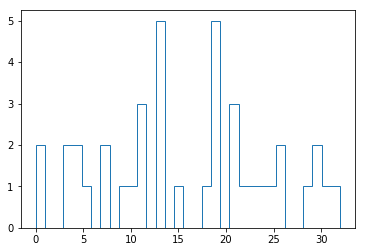

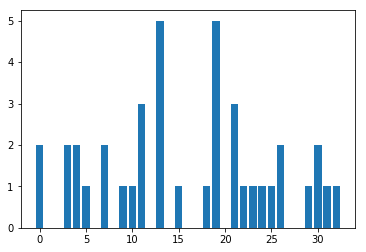

In [12]:
l = list(deltas)

plt.figure("Histogram: The number of cases per hour")
ys, xs, patches = plt.hist(deltas, bins=int((max(deltas)+1)/1), histtype='step')
plt.show()
ys = np.append(ys, [0])

plt.figure("Bar graph: The number of cases per hour")
plt.bar(c.keys(), c.values())

plt.show()


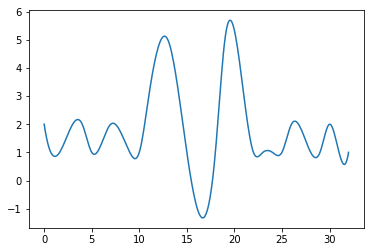

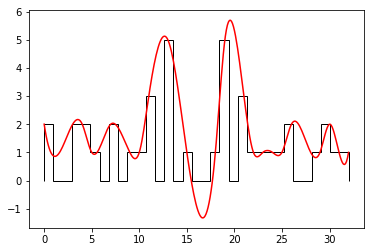

In [13]:
# Smoothed the original
smooth_xs = np.linspace(int(min(c.keys())), int(max(c.keys())), 300)

spl = make_interp_spline(list(c.keys()), list(c.values()), k=3)
smooth_ys = spl(smooth_xs)


plt.figure("This is the curve you were looking for.")
plt.plot(smooth_xs, smooth_ys,)
plt.show()

plt.figure("overlay")
plt.hist(deltas, bins=int((max(deltas)+1)), histtype='step', color='black')
plt.plot(smooth_xs, smooth_ys, '-', color='red')

plt.show()


# Want to see the number of cases that have been reached within r1 and r2

In [14]:
# to incident durations
durations = [pandas.to_timedelta(array[7]) for array in  cases.values]
r1 = timedelta(minutes=10)
r2 = timedelta(minutes=14)

In [15]:
times = {
    'lt_r1' : list(filter(lambda t: t <  r1, durations)),
    'lt_r2' : list(filter(lambda t: t <  r2, durations)),
    'beyond': list(filter(lambda t: t >= r2, durations)),
}

counts = {k:len(v) for k,v in times.items()}
counts

{'lt_r1': 30, 'lt_r2': 40, 'beyond': 0}

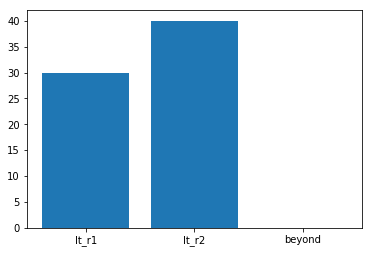

In [16]:
plt.figure("Travel times for the TO_INCIDENT events ")

plt.bar(counts.keys(), counts.values())

plt.show()

# Want to plot the histogram for the coverage

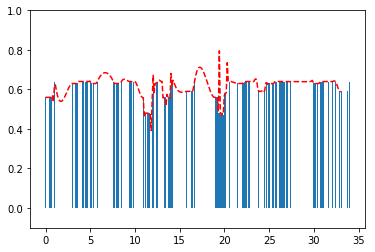

In [17]:
metrics = csvs[2]
coverages = [(pandas.to_datetime(arr[0]), float(arr[1])) for arr in metrics.values]

xs = [cov[0] for cov in coverages]
ys = [cov[1] for cov in coverages]

first = xs[0]
xs = [(date-first).total_seconds()/3600 for date in xs]

# Smoothed the original
smooth_xs = np.linspace(int(min(xs)), int(max(xs)), 300)

spl = make_interp_spline(xs, ys, k=3)
smooth_ys = spl(smooth_xs)


plt.figure("Coverages over time ")
plt.ylim(-0.1, 1.0)
plt.bar(xs, ys, width=0.05)
plt.plot(smooth_xs, smooth_ys, 'r--')
plt.show()

## Read data and organize

Read as a list of dicts so that the same index/object is used for each row.

In [18]:
# Read pandas CSV file 
def read_csv_as_list_of_dicts(filename):
    return 

In [19]:
# Read the specific files
filenames = [
    ""
]

## Restructure the data that is easy for the matplotlib
Want lists of xs and ys.

In [20]:
def restructure_times():
    return

In [21]:
def restructure_coverage():
    return

## Plot them. 
Want multiple plots per graph. Request asked for 1 graph, but still seems to make sense to have 4 graphs.

In [22]:
def plot_times():
    return

In [23]:
def plot_coverage():
    return